In [1]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 98% 418M/428M [00:03<00:00, 148MB/s]
100% 428M/428M [00:03<00:00, 116MB/s]


In [2]:
!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

# **IMPORT MODULES**

In [3]:
import numpy as np
import pandas as pd
import os
import librosa
import librosa.display
from IPython.display import Audio
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from keras import utils

In [4]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [5]:
len(paths)

2800

In [6]:
paths[:5]

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_neat_happy.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_bar_happy.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_bone_happy.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_haze_happy.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_mood_happy.wav']

In [7]:
labels[:5]

['happy', 'happy', 'happy', 'happy', 'happy']

In [8]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/tess toronto emotional speech set dat...,happy
1,/content/tess toronto emotional speech set dat...,happy
2,/content/tess toronto emotional speech set dat...,happy
3,/content/tess toronto emotional speech set dat...,happy
4,/content/tess toronto emotional speech set dat...,happy


In [9]:
df['label'].value_counts()

,count
label,
happy,400
disgust,400
angry,400
sad,400
ps,400
neutral,400
fear,400


<Axes: xlabel='count', ylabel='label'>

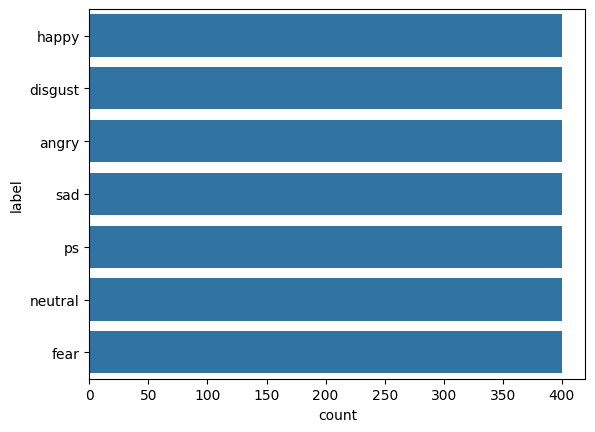

In [10]:
sns.countplot(df['label'])

In [11]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    plt.plot(data)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

In [12]:
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

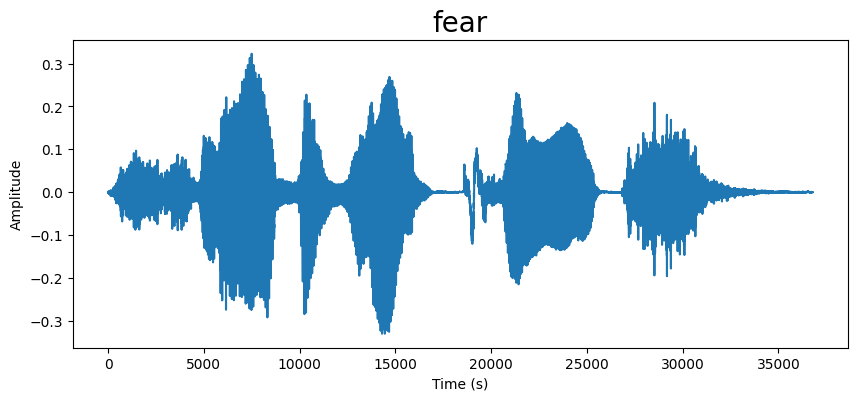

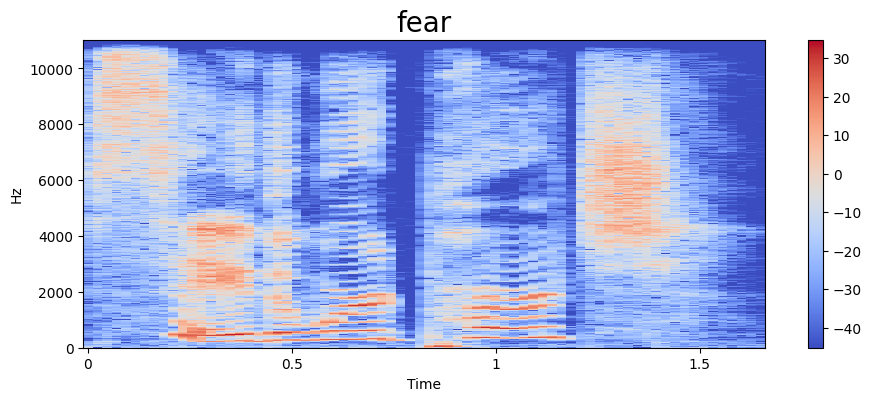

In [13]:
emotion = 'fear'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

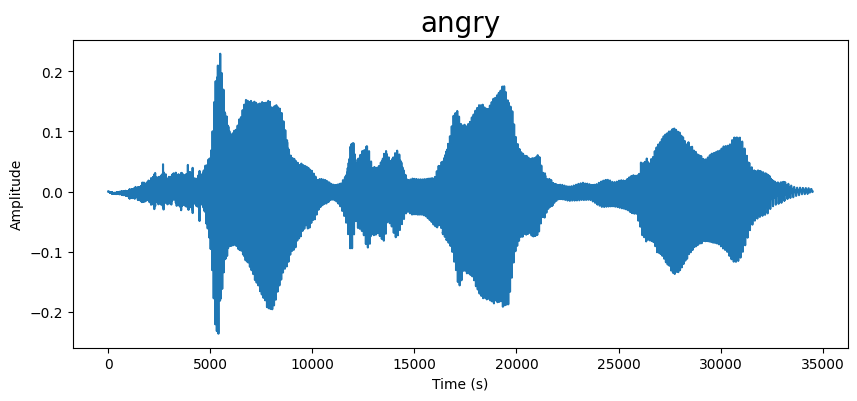

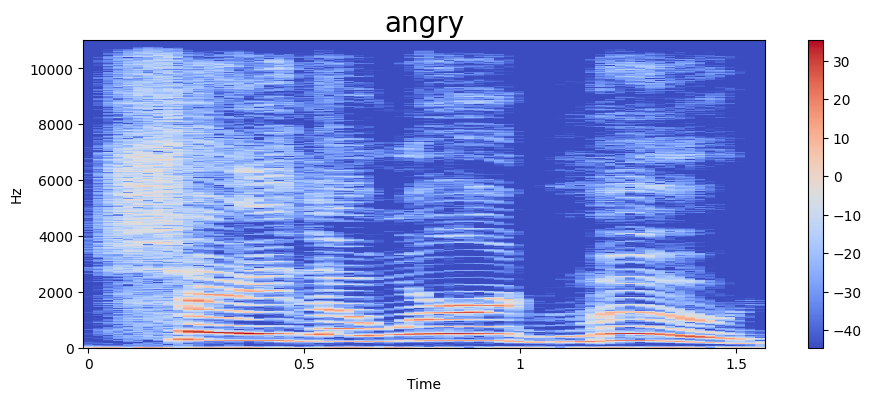

In [14]:
emotion = 'angry'
path = np.array(df['speech'][df['label'] == emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

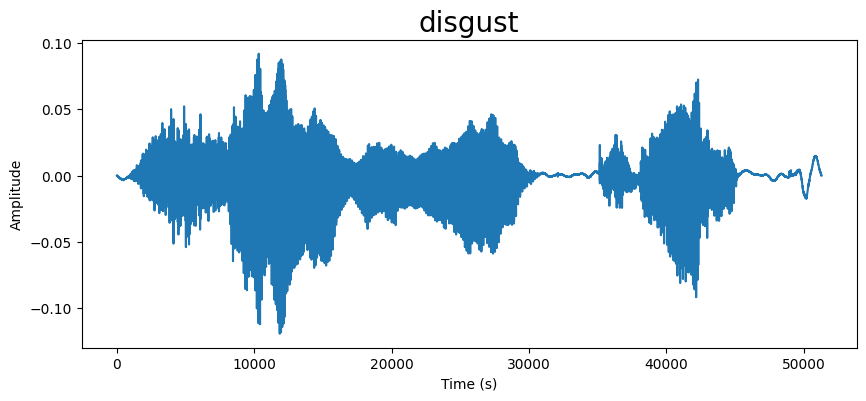

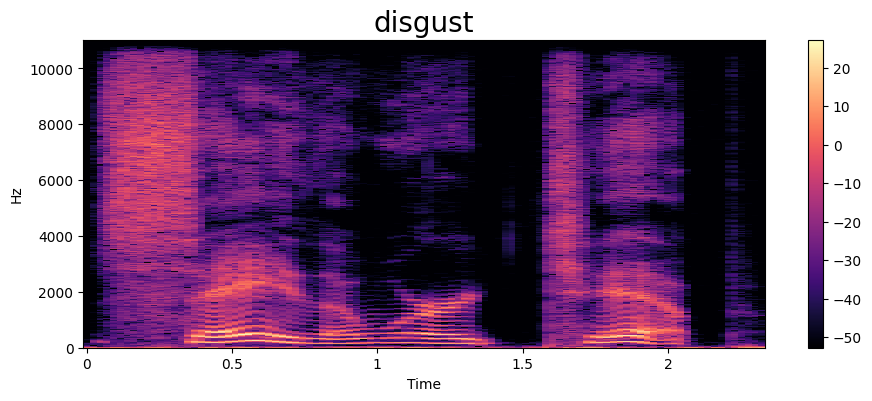

In [15]:
emotion = 'disgust'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

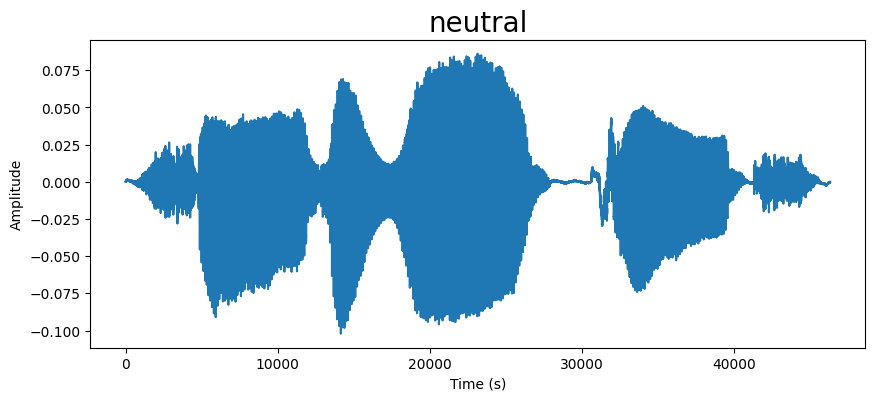

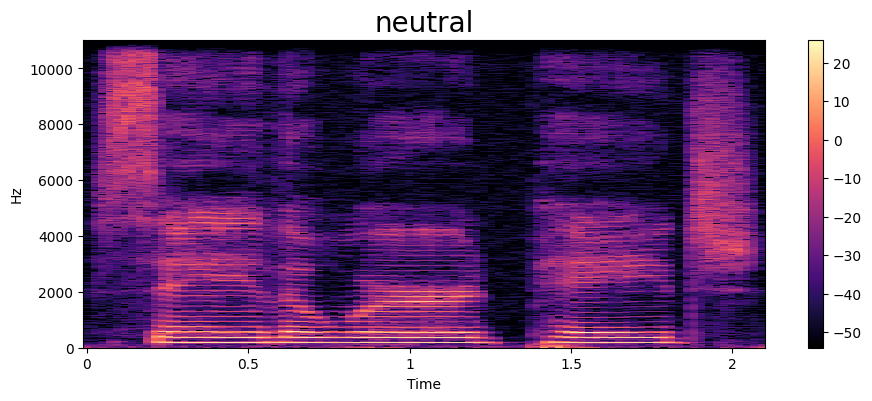

In [16]:
emotion = 'neutral'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

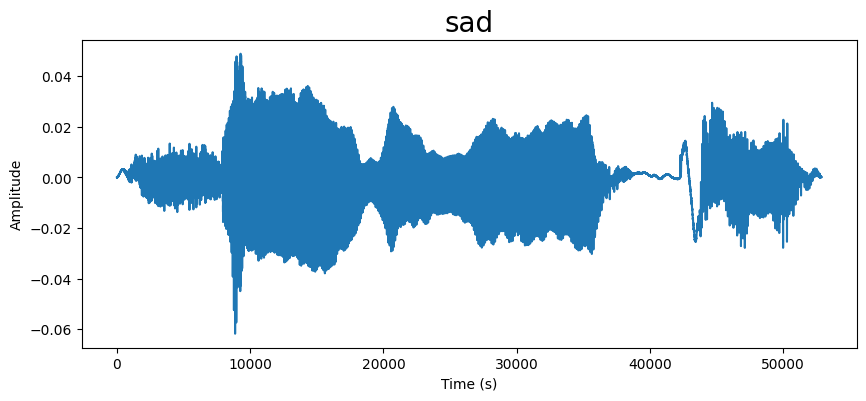

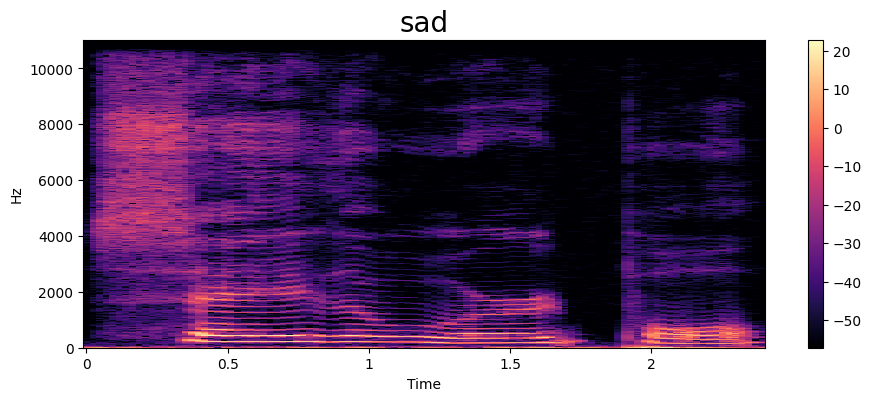

In [17]:
emotion = 'sad'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

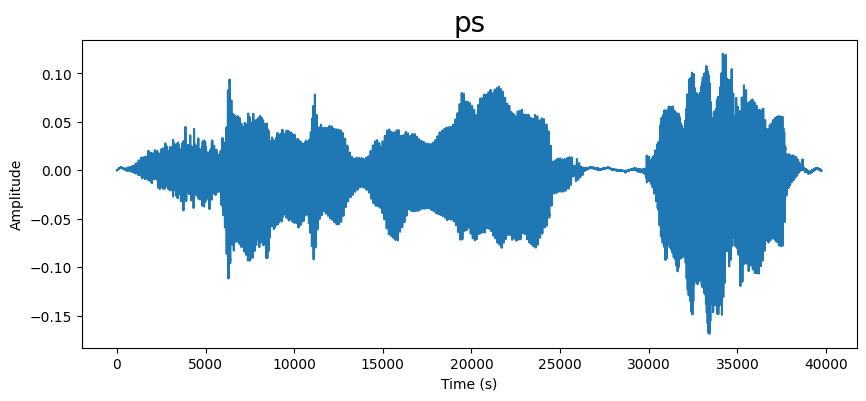

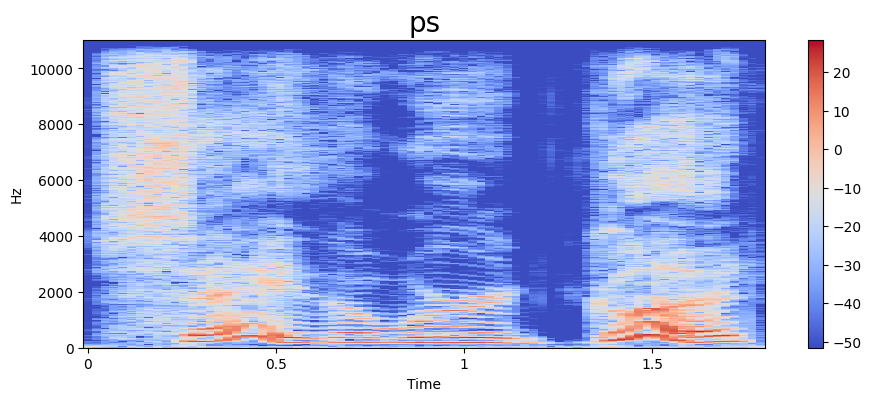

In [18]:
emotion = 'ps'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

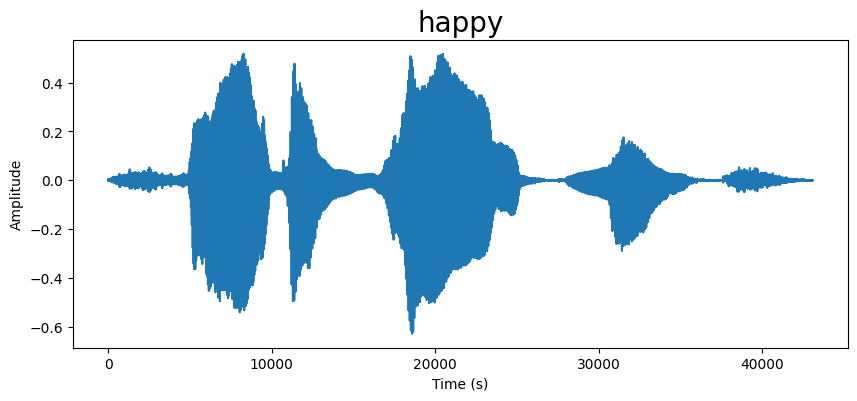

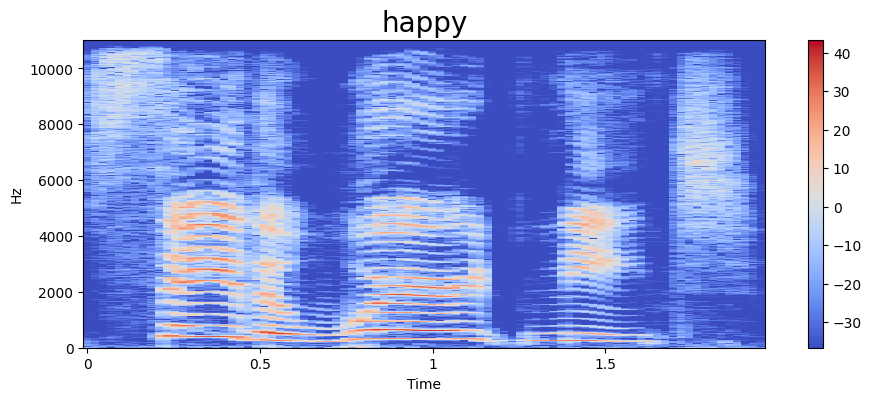

In [19]:
emotion = 'happy'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [20]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [21]:
extract_mfcc(df['speech'][0])
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))
X_mfcc

,speech
0,"[-348.9113, 32.3623, -2.4740398, 37.96641, -7...."
1,"[-290.17346, 72.863945, -38.194107, 6.177735, ..."
2,"[-326.12833, 69.966286, -14.238354, 20.211922,..."
3,"[-336.9496, 29.371023, -10.65343, 42.07175, -0..."
4,"[-302.61328, 46.906944, -17.935892, 37.19776, ..."
...,...
2795,"[-320.14484, 69.09315, -7.660959, 1.5329081, -..."
2796,"[-354.0923, 19.060642, -0.9335648, 16.293133, ..."
2797,"[-328.93008, 34.512203, -4.381163, 15.994027, ..."
2798,"[-341.188, 73.13564, -23.564163, 14.904688, -2..."


In [22]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

# **INPUT SPLIT**

In [23]:
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [24]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [25]:
y = y.toarray()

y.shape


(2800, 7)

# **CREATING LSTM MODELS**

In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [27]:
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40, 1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=64)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 199ms/step - accuracy: 0.3228 - loss: 1.6190 - val_accuracy: 0.6071 - val_loss: 0.7660
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - accuracy: 0.6776 - loss: 0.7824 - val_accuracy: 0.8103 - val_loss: 0.4627
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 199ms/step - accuracy: 0.8277 - loss: 0.4881 - val_accuracy: 0.9308 - val_loss: 0.2261
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - accuracy: 0.8735 - loss: 0.3771 - val_accuracy: 0.9487 - val_loss: 0.1895
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - accuracy: 0.9186 - loss: 0.2293 - val_accuracy: 0.9464 - val_loss: 0.1584
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 205ms/step - accuracy: 0.9365 - loss: 0.1931 - val_accuracy: 0.9487 - val_loss: 0.1499
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 151ms/step - accuracy: 0.9427 - loss: 0.1921 - val_accuracy: 0.9777 - val_loss: 0.1124
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 211ms/step - accuracy: 0.9573 - loss: 0.1262 - val_accuracy: 0

# **PLOT THE RESULTS**

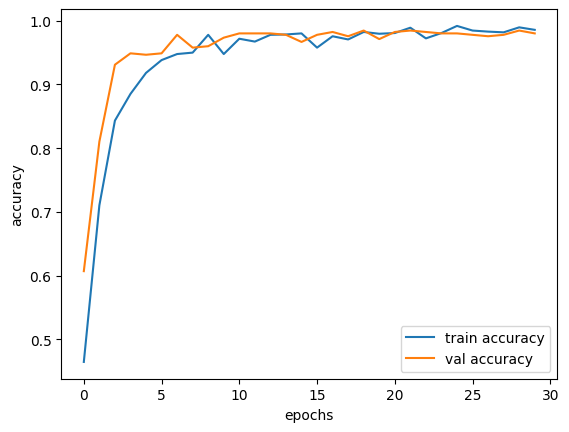

In [30]:
epochs = list(range(30))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

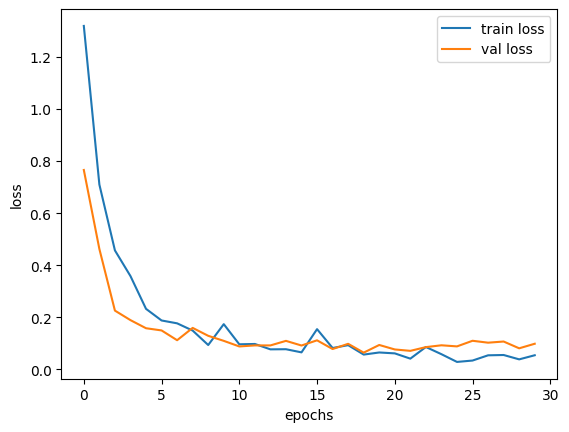

In [31]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#save model
model.save('./models/emotion_model.h5')